<a href="https://colab.research.google.com/github/salma8989/main/blob/main/W6W7W8_Salma_Nurjihan_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**
Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching their website when the covid-19 hits and making them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget.


# **Code Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# **Raw Data Preparation**

##Information of order dataset
*   order_id : an unique number id of each order
*   customer_id : each order has a unique customer_id
*   order_status : status of order (approved, canceled, created, delivered, invoiced, processing, shipped, unavailable)
*   order_purchase_timestamp : date and time when order is purchased
*   order_approved_at : date and time when order is approved
*   order_delivered_carrier_date : date and time when order is delivered by courier
*   order_delivered_customer_date : actual date and time when order is delivered to the customer
*   order_estimated_delivery_date : estimated date when order will be delivered







In [ ]:
order_dataset = 'https://docs.google.com/spreadsheets/d/1SpM9uHk-gICP31K5crNFKm0lNI2xyjwq5RcTOZdl170/edit#gid=1247871413'
order_dataset_trf = order_dataset.replace('/edit#gid=', '/export?format=csv&gid=')
print(order_dataset_trf)
df1 = pd.read_csv(order_dataset_trf)
print(df1.shape)
df1.head()

https://docs.google.com/spreadsheets/d/1SpM9uHk-gICP31K5crNFKm0lNI2xyjwq5RcTOZdl170/export?format=csv&gid=1247871413
(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


##Information of customer dataset


*   customer_id : each order has a unique customer_id
*   customer_unique_id : an unique identifier of a customer
*   customer_zip_code_prefix = number of zipcode the customer
*   customer_city = city of customer where live
*   customer_state = state of customer where live










In [ ]:
customer_dataset = 'https://docs.google.com/spreadsheets/d/1Ozqh8VZtGgdR_JSTxmQ2VILA_m5AWPf_L_w0lMwhfZk/edit#gid=831759660'
customer_dataset_trf = customer_dataset.replace('/edit#gid=', '/export?format=csv&gid=')
print(customer_dataset_trf)
df2 = pd.read_csv(customer_dataset_trf)
print(df2.shape)
df2.head()

https://docs.google.com/spreadsheets/d/1Ozqh8VZtGgdR_JSTxmQ2VILA_m5AWPf_L_w0lMwhfZk/export?format=csv&gid=831759660
(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Information of payment dataset
*   order_id : an unique number id of each order
*   payment_sequential : a customer may pay an order with more than one payment method. If he does so, a sequence will be created (1-29)
*   payment_type : payment method that customer used 
*   payment_installments : number of installments chosen by the customer (0-24)
*   payment_value : value of payment 



In [ ]:
payment_dataset = 'https://docs.google.com/spreadsheets/d/1TthHDGvNoNqP01gk6sbS4ysxFcA4eZthAbEQ9Sc79BA/edit#gid=577198163'
payment_dataset_trf = payment_dataset.replace('/edit#gid=', '/export?format=csv&gid=')
print(payment_dataset_trf)
df3 = pd.read_csv(payment_dataset_trf)
print(df3.shape)
df3.head()

https://docs.google.com/spreadsheets/d/1TthHDGvNoNqP01gk6sbS4ysxFcA4eZthAbEQ9Sc79BA/export?format=csv&gid=577198163
(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# **1. Cleaning the data**

# a. Removing irrelevant values
order_estimated_delivery_date columns is estimate delivery date (not actual) and it will not used in analysis, so I remove it

In [ ]:
dforder = df1.copy()

In [ ]:
dforder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
dforder.drop(columns=['order_estimated_delivery_date'],inplace=True)

In [ ]:
dforder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [ ]:
dfcustomer = df2.copy()

In [ ]:
dfcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
dfpayment = df3.copy()

In [ ]:
dfpayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


# b. Handling missing value

In [ ]:
dforder.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

In [ ]:
dforder[dforder.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 4:31:18,2018-06-05 14:32:00,NaN
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 6:15:14,NaN,NaN
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 2:32:30,2018-01-11 19:39:23,NaN
...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 7:18:05,NaN,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN


In [ ]:
dforder.dropna(inplace=True)

In [ ]:
dforder.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64

In [ ]:
dforder.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [ ]:
#remove order_id which cancelled
dforder = dforder[dforder['order_status'] == 'delivered']

In [ ]:
dfcustomer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
dfpayment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
dfpayment.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
#remove payment_type which not_defined
dfpayment = dfpayment[~dfpayment['payment_type'].isin(['not_defined'])]

In [ ]:
dfpayment.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

# c. Removing duplicate values

In [ ]:
dforder[dforder.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date


In [ ]:
dfcustomer[dfcustomer.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [ ]:
dfpayment[dfpayment.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


there is no duplicated in three datasets

# d. Remove outliers

In [ ]:
dfpayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


i= 0 el payment_sequential
i= 1 el payment_installments
i= 2 el payment_value


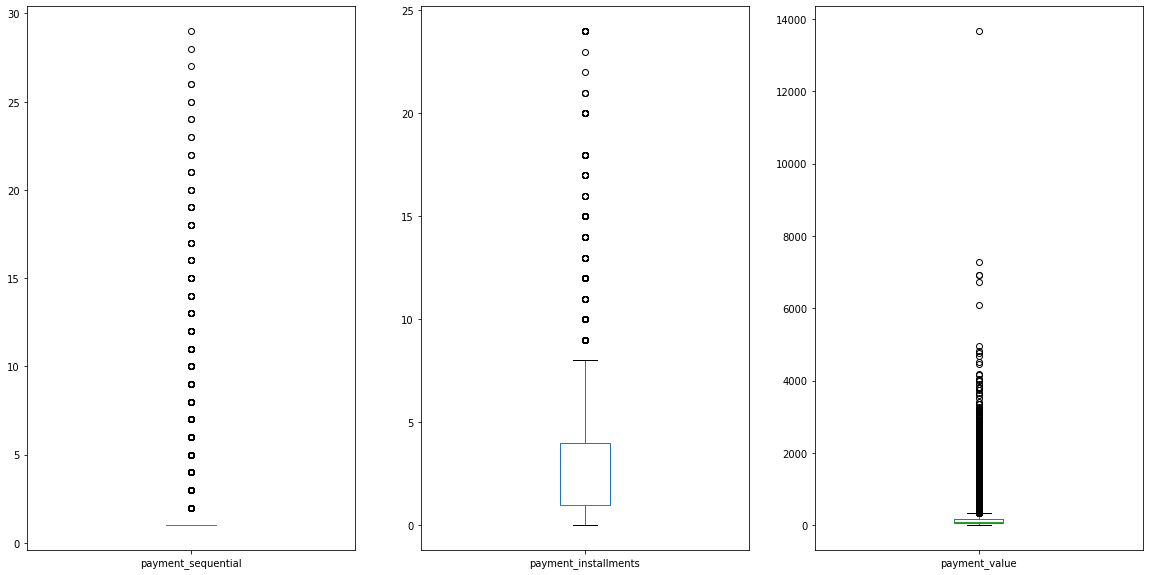

In [ ]:
numerical_column = ['payment_sequential', 'payment_installments', 'payment_value']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = dfpayment.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
#Check outlier in payment_value column
Q1 = dfpayment['payment_value'].quantile(.25)
Q3 = dfpayment['payment_value'].quantile(.75)
IQR = Q3-Q1
boxplot_max = Q3+(1.5*IQR)
boxplot_min = Q1-(1.5*IQR)

print('IQR',IQR)
print('max',boxplot_max)
print('min',boxplot_min)

IQR 115.04
max 344.4
min -115.76


In [ ]:
filter_paymentvalue_min = dfpayment['payment_value']<-115.76
filter_paymentvalue_max = dfpayment['payment_value']>344.4

df_outlier = dfpayment[
    (filter_paymentvalue_min|filter_paymentvalue_max)]

df_outlier[['order_id', 'payment_value']]

,order_id,payment_value
23,4d680edbaa7d3d9bed69532957368a03,353.09
26,d0a945f85ba1074b60aac97ade7e240e,541.00
52,2e2c60b99754ae1e4d8b18846cfec9f2,542.66
54,95442deb81a5d91c97c0df96b431634a,368.98
61,3ab4eea6776259ae8dfbabaeffece352,387.80
...,...,...
103814,df8ab61cb615d551483618533aceb364,713.65
103843,262bf694d9c87de7844dd80b98fcfef3,372.08
103861,691688405bcee3ff9023639514498962,356.53
103881,0406037ad97740d563a178ecc7a2075c,363.31


In [ ]:
df_outlier['payment_value'].count()

7981

In [ ]:
df_outlier['payment_value'].count()/dfpayment['payment_value'].count()

0.07682681478201438

payment value outlier summary:

there are 7981 (7.6%) payment value that have outlier.

checking on the boxplot, there are group with payment value between boxplot_max until 2500. so we remove outlier with payment value > 2500

In [ ]:
dfpayment_clean = dfpayment[(dfpayment['payment_value']<=2500)&(dfpayment['payment_value']>0)]
dfpayment_clean


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


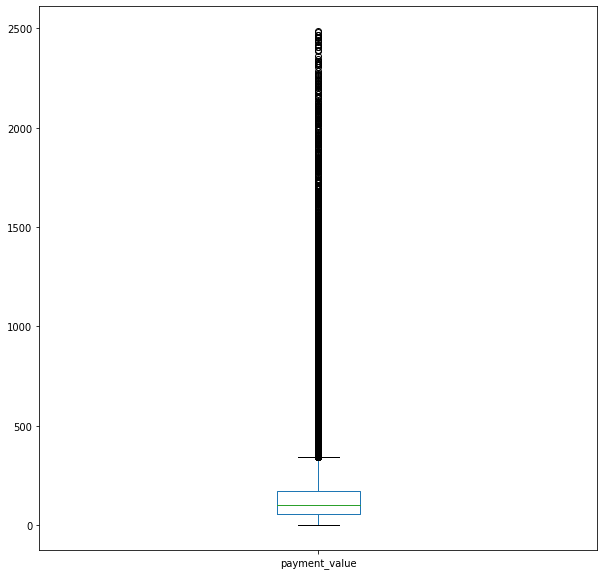

In [ ]:
dfpayment_clean.boxplot(column=['payment_value'],fontsize=10,rot=0,grid=False,figsize=(10,10));

# e. Coverting data types

In [ ]:
dforder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
dtypes: object(7)
memory usage: 5.9+ MB


In [ ]:
#change datatype into datetime
dforder [['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']] = dforder[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].apply(pd.to_datetime)

In [ ]:
dforder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


In [ ]:
dfcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
#change datatype into object
dfcustomer['customer_zip_code_prefix'] = dfcustomer['customer_zip_code_prefix'].astype('object')

In [ ]:
dfcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
dfpayment_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103791 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103791 non-null  object 
 1   payment_sequential    103791 non-null  int64  
 2   payment_type          103791 non-null  object 
 3   payment_installments  103791 non-null  int64  
 4   payment_value         103791 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


# f. Combine the dataset into single dataset

In [ ]:
df = dforder.merge(dfcustomer, on = 'customer_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
df = df.merge(dfpayment_clean, on = 'order_id')
print(df.shape)
df.head()


(100648, 15)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [ ]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [ ]:
dfcleaned = df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date', 'customer_unique_id','customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value']]
dfcleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12


In [ ]:
#download the merge dataset
dfcleaned.to_csv('cleaned_dataset.csv')

# **2. EDA**

# a. Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100648 entries, 0 to 100647
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100648 non-null  object        
 1   customer_id                    100648 non-null  object        
 2   order_status                   100648 non-null  object        
 3   order_purchase_timestamp       100648 non-null  datetime64[ns]
 4   order_approved_at              100648 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100648 non-null  datetime64[ns]
 6   order_delivered_customer_date  100648 non-null  datetime64[ns]
 7   customer_unique_id             100648 non-null  object        
 8   customer_zip_code_prefix       100648 non-null  object        
 9   customer_city                  100648 non-null  object        
 10  customer_state                 100648 non-null  object        
 11  

In [ ]:
df_desc_stat = df.describe()
df_desc_stat

,payment_sequential,payment_installments,payment_value
count,100648.000000,100648.000000,100648.000000
mean,1.088357,2.849187,150.359494
std,0.652851,2.681299,187.012736
min,1.000000,0.000000,0.010000
25%,1.000000,1.000000,56.780000
50%,1.000000,1.000000,99.950000
75%,1.000000,4.000000,171.002500
max,26.000000,24.000000,2487.240000


In [ ]:
df_desc_stat.loc['kurtosis'] = df[['payment_sequential','payment_installments','payment_value']].kurt()
df_desc_stat.loc['skewness'] = df[['payment_sequential','payment_installments','payment_value']].skew()
df_desc_stat.loc['variance'] = df[['payment_sequential','payment_installments','payment_value']].var()
df_desc_stat

,payment_sequential,payment_installments,payment_value
count,100648.000000,100648.000000,100648.000000
mean,1.088357,2.849187,150.359494
std,0.652851,2.681299,187.012736
min,1.000000,0.000000,0.010000
25%,1.000000,1.000000,56.780000
50%,1.000000,1.000000,99.950000
75%,1.000000,4.000000,171.002500
max,26.000000,24.000000,2487.240000
kurtosis,321.519559,2.595010,34.205035
skewness,15.110349,1.660823,4.836668


In [ ]:
df_desc_stat = round(df_desc_stat,2)
df_desc_stat

,payment_sequential,payment_installments,payment_value
count,100648.00,100648.00,100648.00
mean,1.09,2.85,150.36
std,0.65,2.68,187.01
min,1.00,0.00,0.01
25%,1.00,1.00,56.78
50%,1.00,1.00,99.95
75%,1.00,4.00,171.00
max,26.00,24.00,2487.24
kurtosis,321.52,2.60,34.21
skewness,15.11,1.66,4.84


In [ ]:
df[['payment_sequential','payment_installments','payment_value']].mode()

,payment_sequential,payment_installments,payment_value
0,1,1,50.0


Text(0.5, 0, 'payment_sequential')

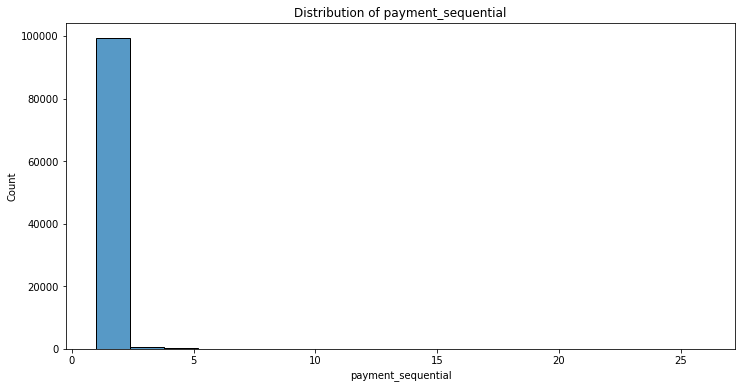

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='payment_sequential', data=df)
plt.title('Distribution of payment_sequential')
plt.xlabel('payment_sequential')

Text(0.5, 0, 'payment_installments')

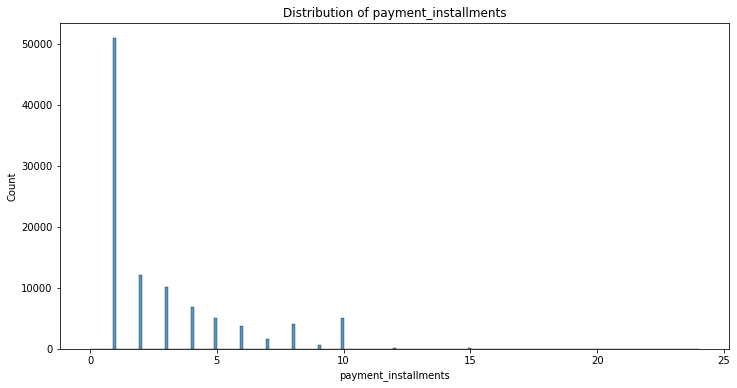

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='payment_installments', data=df)
plt.title('Distribution of payment_installments')
plt.xlabel('payment_installments')

Text(0.5, 0, 'payment_value')

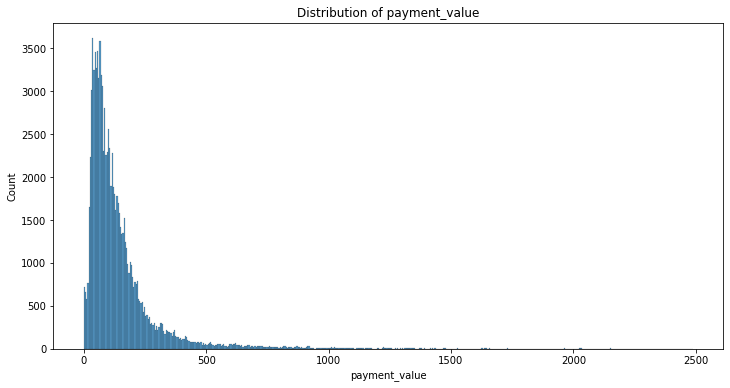

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='payment_value', data=df)
plt.title('Distribution of payment_value')
plt.xlabel('payment_value')

In [ ]:
df[['order_status', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_type']].describe()

,order_status,customer_zip_code_prefix,customer_city,customer_state,payment_type
count,100648,100648,100648,100648,100648
unique,1,14889,4085,27,4
top,delivered,22790,sao paulo,SP,credit_card
freq,100648,136,15686,42272,74519


**Insight :**

**payment sequential**
*   most customer did transaction with payment sequential is 1
*   distribution of payment sequential is positively skewed which showed in histogram

**payment installment**
*   most customer did transaction with payment installment is 1
*   distribution of payment installment is positively skewed which showed in histogram

**payment value**
*   average payment value is 150
*   maximum payment value is 2487.24 and minimum payment value is 0.01
*   distribution of payment value is positively skewed which showed in histogram

**customer**
*   customers are spread out in 4085 city and 27 state
*   top location of customers are in sao paulo city (15%) and SP state (42%)
*   credit card is most favorite payment type by customer










# b. Visualize the data

*   **Number of orders per month**



In [ ]:
df['order_purchase_year_month'] = df['order_approved_at'].dt.strftime('%Y-%m')
df_number_order = df.groupby('order_purchase_year_month')['order_id'].agg('count').reset_index()
df_number_order = pd.DataFrame(df_number_order)
df_number_order.columns = ['order_purchase_year_month','number_of_order']
df_number_order

,order_purchase_year_month,number_of_order
0,2016-10,282
1,2016-12,1
2,2017-01,762
3,2017-02,1731
4,2017-03,2702
5,2017-04,2404
6,2017-05,3783
7,2017-06,3322
8,2017-07,4101
9,2017-08,4419


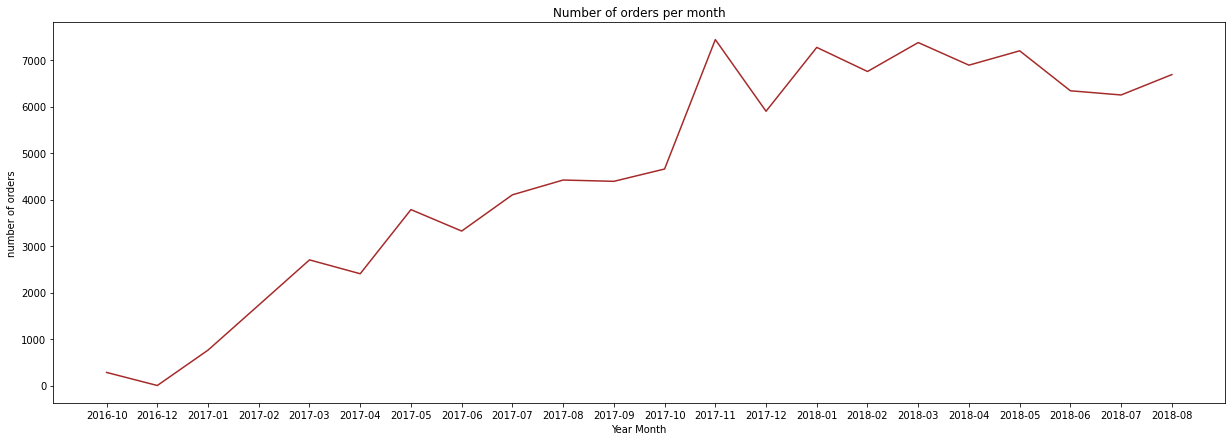

In [ ]:
plt.figure(figsize=(21,7))
sns.lineplot(x='order_purchase_year_month', y='number_of_order', data=df_number_order, color='brown')
plt.title('Number of orders per month')
plt.xlabel('Year Month')
plt.ylabel('number of orders')
plt.show()

*   **Daily orders trend (which day of week is the busiest)**




In [ ]:
df['day'] = df['order_approved_at'].dt.day_name() 
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_day = df.groupby('day')['order_id'].agg('count').reindex(days)
df_day = pd.DataFrame(df_day)
df_day.reset_index(inplace=True)
df_day.columns = ['day','number_of_order']
df_day

,day,number_of_order
0,Monday,13284
1,Tuesday,19322
2,Wednesday,16028
3,Thursday,15660
4,Friday,14877
5,Saturday,12339
6,Sunday,9138


Text(0, 0.5, 'number of orders')

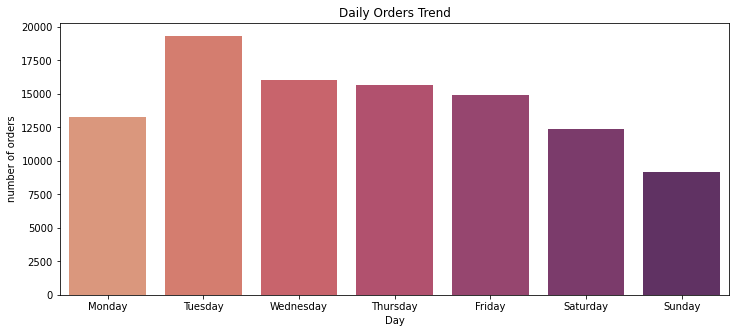

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='day', y='number_of_order', data=df_day, palette="flare")
plt.title('Daily Orders Trend')
plt.xlabel('Day')
plt.ylabel('number of orders')

*   **Percentage of orders per payment type**

In [ ]:
df_payment = df.groupby('payment_type').agg({'order_id':pd.Series.count}).reset_index()
df_payment.columns = ['payment_type','number_of_order']
df_payment

,payment_type,number_of_order
0,boleto,19158
1,credit_card,74519
2,debit_card,1482
3,voucher,5489


In [ ]:
df_payment.sort_values(by='number_of_order',ascending = False,inplace = True)
df_payment

,payment_type,number_of_order
1,credit_card,74519
0,boleto,19158
3,voucher,5489
2,debit_card,1482


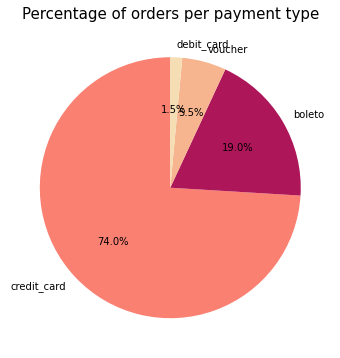

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Percentage of orders per payment type',fontsize=15)
plt.pie(df_payment['number_of_order'],labels=df_payment['payment_type'],autopct='%1.1f%%', startangle = 90, colors = ['#FA8072','#ad1759','#f6b48f','#F5DEB3'])

plt.show()

**Insight :**
*   Number of orders per month tends to increase from Oct 2016 until  Nov 2017. Number of orders per month tends to stagnant from Dec 2017 until Aug 2018.
*   Tuesday is the busiest day of orders with 19322 orders. Maybe after having busy day in Monday, customer like to do purchase online in Tuesday. 

    Wednesday, Thursday, and Friday are the second busiest day of order with average 15521 orders.

    Sunday is time for customer holiday so it is the lowest day of order with 9138 orders
*   Most of customers (74%) are using credit card as payment method. It is shown that credit card is most convenient payment type 

   19% customer use boleto , 5.5% customer use voucher, and 1.5% customer use debit card as payment method






